In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


In [2]:
X_train = pd.read_csv('0_X_train.csv', index_col='Id')
X_valid = pd.read_csv('1_X_valid.csv', index_col='Id')
X_test  = pd.read_csv('2_X_test.csv', index_col='Id')
y_train = pd.read_csv('0_y_train.csv', index_col='Id')
y_valid = pd.read_csv('1_y_valid.csv', index_col='Id')
y_test  = pd.read_csv('2_y_test.csv', index_col='Id')

num_vars = ['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']

X_train.shape

(6266, 31)

c:\Users\emann\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


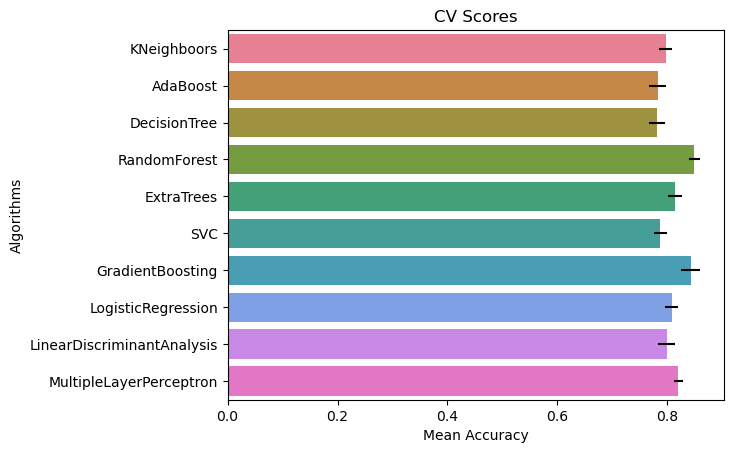

In [3]:
# Cross validate model with Kfold stratified cross val
K_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# Modeling step Test differents algorithms 
random_state = 2

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(ExtraTreesClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))
models.append(LinearDiscriminantAnalysis())
models.append(MLPClassifier(random_state=random_state))


for model in models :
    cv_results.append(cross_val_score(model, X_train, y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVC",
                     "GradientBoosting",                      
                     "LogisticRegression",
                     "LinearDiscriminantAnalysis",
                     "MultipleLayerPerceptron"]
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

In [3]:
# # cols to remove from datasets
# cols_lasso = ['banner_views_old', 'days_elapsed_old', 'X3', 'marital_divorced', 'job_entrepreneur', 'job_freelance',
#              'job_housekeeper', 'job_technology', 'job_unemployed']
# # how to remove them:
# X_train = X_train.drop(columns=cols_lasso)
# X_valid = X_valid.drop(columns=cols_lasso)
# X_test  = X_test.drop(columns=cols_lasso)

(6266, 22)

In [4]:
X_train = X_train.drop(columns=['marital_married', 'outcome_old_failure', 'job_manager'])
X_valid = X_valid.drop(columns=['marital_married', 'outcome_old_failure', 'job_manager'])
X_test  = X_test.drop(columns=['marital_married', 'outcome_old_failure', 'job_manager'])

In [5]:
std_num = ColumnTransformer(transformers=[('std_num', StandardScaler(), num_vars)],
                            remainder='passthrough')

In [6]:
# Define the pipeline
logistic_pipe = Pipeline([
    ('std_num', std_num),
    ('logistic_log', LogisticRegression(penalty='l2', solver='liblinear', C=1, fit_intercept=True, class_weight='balanced'))
])

In [7]:
y_train = np.array(y_train)
y_train = y_train.ravel()

In [11]:
logistic_grid = np.linspace(start=0.0001, stop=0.2, num=100)
param_grid={'logistic_log__C': logistic_grid}

logCV = GridSearchCV(estimator=logistic_pipe,
                       param_grid=param_grid,
                       scoring="accuracy",
                       cv=KFold(n_splits=10, shuffle=True, random_state=34),
                       n_jobs=-2)

logCV.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=34, shuffle=True),
             estimator=Pipeline(steps=[('std_num',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('std_num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'time_spent',
                                                                          'banner_views',
                                                                          'banner_views_old',
                                                                          'days_elapsed_old',
                                                                          'X4'])])),
                                       ('logistic_log',
                                    

In [13]:
pd.DataFrame(logCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic_log__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029654,0.019214,0.008318,0.010975,0.0001,{'logistic_log__C': 0.0001},0.743222,0.744817,0.709729,0.740032,0.685805,0.717703,0.765176,0.749201,0.739617,0.726837,0.732214,0.021610,100
1,0.051387,0.027840,0.008856,0.008547,0.002119,{'logistic_log__C': 0.002119191919191919},0.802233,0.813397,0.795853,0.797448,0.771930,0.779904,0.838658,0.806709,0.801917,0.800319,0.800837,0.017135,99
2,0.059940,0.027106,0.011655,0.005813,0.004138,{'logistic_log__C': 0.004138383838383839},0.811802,0.821372,0.808612,0.802233,0.783094,0.794258,0.840256,0.805112,0.811502,0.813099,0.809134,0.014527,98
3,0.046377,0.020577,0.008257,0.003854,0.006158,{'logistic_log__C': 0.006157575757575758},0.813397,0.816587,0.810207,0.807018,0.789474,0.794258,0.833866,0.813099,0.811502,0.811502,0.810091,0.011474,97
4,0.051246,0.012597,0.010520,0.007227,0.008177,{'logistic_log__C': 0.008176767676767676},0.814992,0.830941,0.808612,0.807018,0.791069,0.795853,0.840256,0.813099,0.808307,0.816294,0.812644,0.013894,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.065567,0.022667,0.010683,0.006085,0.191923,{'logistic_log__C': 0.19192323232323233},0.819777,0.827751,0.818182,0.819777,0.807018,0.795853,0.849840,0.808307,0.816294,0.819489,0.818229,0.013509,63
96,0.057552,0.010594,0.009853,0.004648,0.193942,{'logistic_log__C': 0.19394242424242425},0.819777,0.827751,0.818182,0.819777,0.807018,0.795853,0.849840,0.808307,0.816294,0.819489,0.818229,0.013509,63
97,0.052632,0.008666,0.008216,0.005269,0.195962,{'logistic_log__C': 0.19596161616161614},0.819777,0.827751,0.818182,0.819777,0.807018,0.795853,0.849840,0.808307,0.816294,0.819489,0.818229,0.013509,63
98,0.054930,0.009927,0.010819,0.007405,0.197981,{'logistic_log__C': 0.19798080808080806},0.819777,0.827751,0.818182,0.819777,0.807018,0.795853,0.849840,0.808307,0.816294,0.819489,0.818229,0.013509,63


In [14]:
# Choose best model that minimizes cv_err
mean_scores = logCV.cv_results_["mean_test_score"]
std_scores = logCV.cv_results_["std_test_score"] / np.sqrt(logCV.n_splits_)
C_values = logCV.cv_results_["param_logistic_log__C"].data

best_index = np.argmax(mean_scores)
max_C_log = C_values[best_index]
threshold_log = mean_scores[best_index] - std_scores[best_index]
one_std_rule_C_log = np.max(C_values[mean_scores <= threshold_log])

print("Minimum C:", max_C_log)
print("1-SD C:", one_std_rule_C_log)
print("Best score for logistic:", np.max(mean_scores))

Minimum C: 0.06673333333333334
1-SD C: 0.014234343434343434
Best score for logistic: 0.8195046139892282


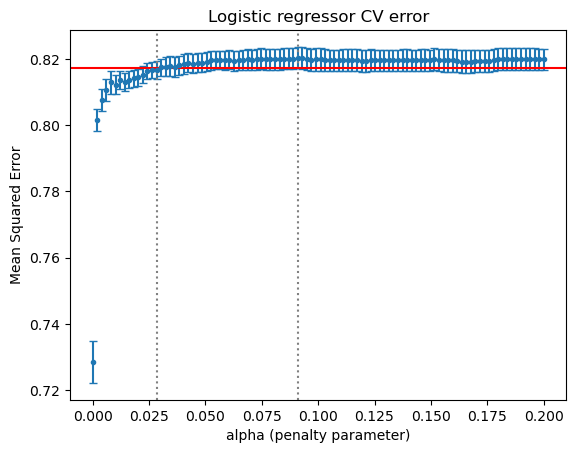

In [36]:
# plt.figure(figsize=(7,6))
plt.errorbar(x=C_values, y=mean_scores, yerr=std_scores, fmt='.', capsize=3)

plt.axvline(x=max_C_log, ls='dotted', color="grey")  # vertical line at the k yielding minimum CV MSE
plt.axvline(x=one_std_rule_C_log, ls='dotted', color="grey")   # vertical line at best k value according to 1 std err rule
plt.axhline(y=threshold_log, color="red")  # horizontal line line at best k value according to 1 std err rule

plt.title("Logistic regressor CV error")
plt.xlabel('alpha (penalty parameter)')
plt.ylabel('Mean Squared Error')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score 

# Fit pipeline to training data
logistic_pipe.fit(X_train, y_train) # Fit it to the training data 

# Predict pipeline to training data
y_train_pred = logistic_pipe.predict(X_train) # Predict the class labels for the training data
acc = accuracy_score(y_train, y_train_pred) # Calculate the accuracy of the predictions 
print("Logistic --- Accuracy on training:", acc)

# Predict pipeline to test data
y_test_pred = logistic_pipe.predict(X_test) # Predict the class labels for the test data
acc = accuracy_score(y_test, y_test_pred) # Calculate the accuracy of the predictions 
print("Logistic --- Accuracy on test:", np.round(acc, 3))

Logistic --- Accuracy on training: 0.8220555378231726
Logistic --- Accuracy on test: 0.819


In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

classifiers = {
    "Dummy"        : DummyClassifier(strategy='uniform'),
    "KNN(3)"       : KNeighborsClassifier(3), 
    "RBF SVM"      : SVC(gamma=2, C=1), 
    "Decision Tree": DecisionTreeClassifier(max_depth=7), 
    "Random Forest": RandomForestClassifier(max_depth=7, n_estimators=10, max_features=4), 
    "Neural Net"   : MLPClassifier(alpha=1), 
    "AdaBoost"     : AdaBoostClassifier(),
    "Naive Bayes"  : GaussianNB(), 
    "QDA"          : QuadraticDiscriminantAnalysis(),
    "Linear SVC"   : LinearSVC(),
    "Linear SVM"   : SVC(kernel="linear"), 
    "Gaussian Proc": GaussianProcessClassifier(1.0 * RBF(1.0)),
    "LogisticRegr" : LogisticRegression()
}

In [25]:
# Start timing the models above
from time import time
nfast = 14      # Don't run the very slow ones
head = list(classifiers.items())[:nfast]

for name, classifier in head:
    start = time()
    classifier.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    score = classifier.score(X_test, y_test)
    score_time = time()-start
    print("{:<15}| score = {:.3f} | time = {:,.3f}s/{:,.3f}s".format(name, score, train_time, score_time))

Dummy          | score = 0.514 | time = 0.011s/0.012s


c:\Users\emann\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN(3)         | score = 0.799 | time = 0.018s/0.402s
RBF SVM        | score = 0.590 | time = 7.227s/3.080s
Decision Tree  | score = 0.822 | time = 0.055s/0.005s
Random Forest  | score = 0.794 | time = 0.111s/0.010s
Neural Net     | score = 0.823 | time = 4.973s/0.007s
AdaBoost       | score = 0.829 | time = 0.713s/0.043s
Naive Bayes    | score = 0.724 | time = 0.015s/0.006s
QDA            | score = 0.735 | time = 0.042s/0.007s


c:\Users\emann\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVC     | score = 0.722 | time = 1.042s/0.005s
Linear SVM     | score = 0.815 | time = 84.961s/0.150s
